In [161]:
import pandas as pd

In [162]:
file_path = './medical.csv'
medical_df = pd.read_csv(file_path)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [163]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [164]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Analysis and Visualization

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px

%matplotlib inline

In [166]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']= (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [167]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [168]:


fig = px.histogram(data_frame=medical_df, x='age', marginal='box', title='Distribution of Age', nbins=47)
fig.update_layout(bargap=0.1)

fig.show()

# Body Mass Index

In [169]:
fig = px.histogram(medical_df, x='bmi', marginal='box', title='Distribution of BMI', color_discrete_sequence=['red'])
fig.update_layout(bargap = 0.1)
fig.show()

# Charges

In [170]:
fig = px.histogram(medical_df, x='charges', title='Distribution of Charges', marginal='box', color_discrete_sequence=['green', 'grey'], color='smoker')
fig.update_layout(bargap = 0.1)

fig.show()

# Sex

In [171]:
fig = px.histogram(medical_df, x='sex',marginal='box', title='Distribution of Sex', color='region')
fig.update_layout(bargap = 0.1)

# Region

In [172]:
fig = px.histogram(medical_df, x='region', title="Distribution of Region", color_discrete_sequence=[ 'orange'], marginal='box')
fig.update_layout(bargap = 0.1)
fig.show()

# Smoker

In [173]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [174]:
fig = px.histogram(medical_df, x='smoker', color='sex', title="Smoker")
fig.update_layout(bargap = 0.1)
fig.show()


### Age and Charges

In [175]:
fig = px.scatter(medical_df,
                  x='age', 
                  y='charges', 
                  color='smoker',
                  title='Age vs Charge', 
                  hover_data=['sex'],
                  opacity=0.8
                )
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges

In [176]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 title='BMI vs Charges',
                 hover_data=['sex']
                )
fig.update_traces(marker_size=5)
fig.show()

### Charges and Sex

In [177]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                title='Charges vs Sex'
            )
fig.show()

### Charges vs Children

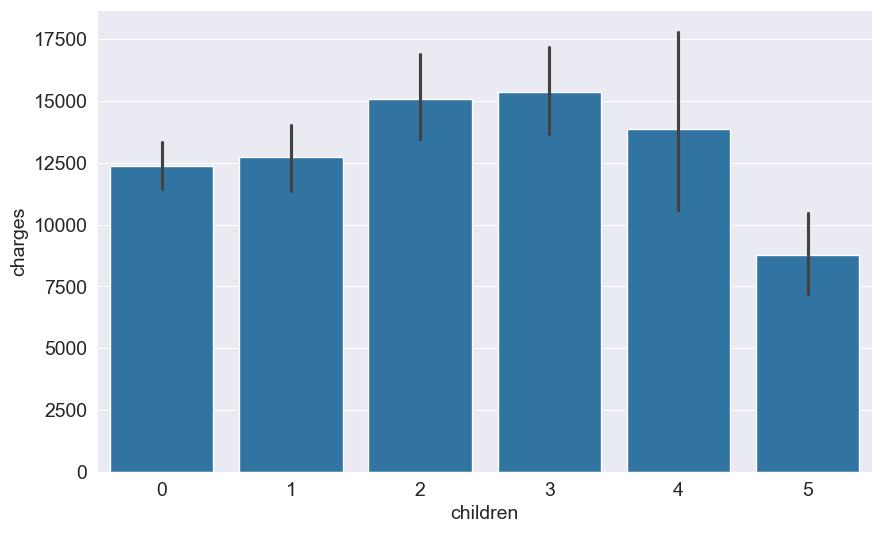

In [178]:
fig = sns.barplot(medical_df, x='children', y='charges', )
# fig = px.scatter(medical_df,
#                  x='children',
#                  y='charges',
#                  title='Charges vs Children',
#                  color='smoker'
#                  )

### Correlation Co-Efficient

In [179]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [180]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [181]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [182]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [183]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [184]:
sex_values= {'male': 1, 'female': 0}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

np.float64(0.05729206220202533)

In [185]:
px.scatter(medical_df, x='bmi', y='charges')

In [186]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

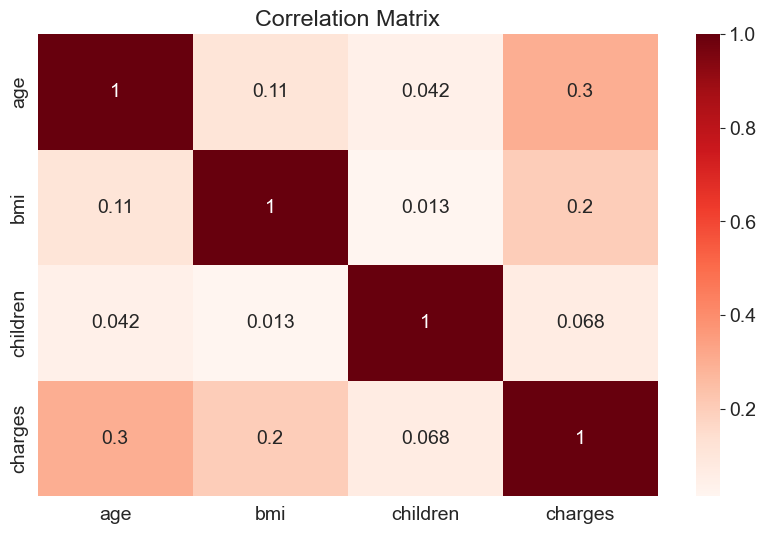

In [187]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(), 
            cmap='Reds',
            annot=True
            )
plt.title("Correlation Matrix")

### Linear Regression using a Single Feature

In [188]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

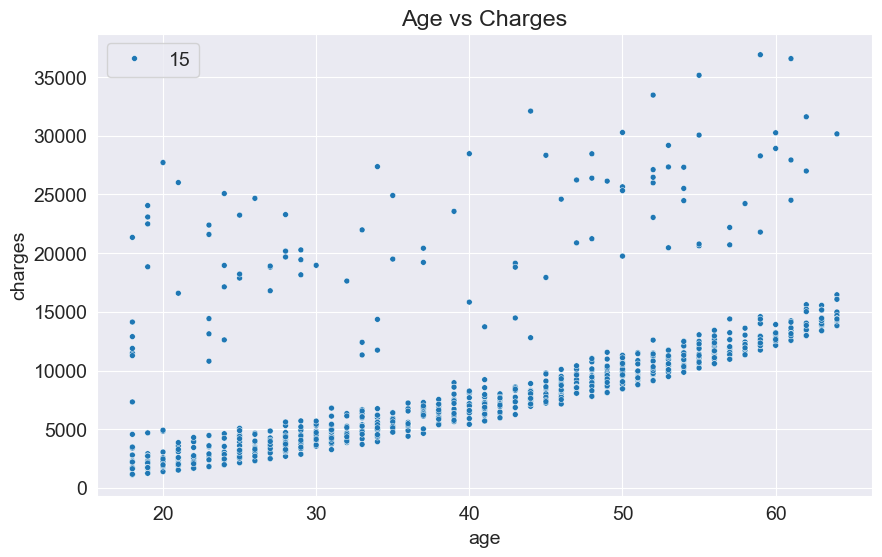

In [189]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df, 
                x='age', 
                y='charges',
                # alpha=0.7,
                size=15

                )

In [190]:
def estimate_charges(age, w, b):
    return (w * age) + b


In [191]:
w = 50
b = 100

In [192]:
estimate_charges(30, w, b)

1600

In [193]:
non_smoker_df.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [194]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [195]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

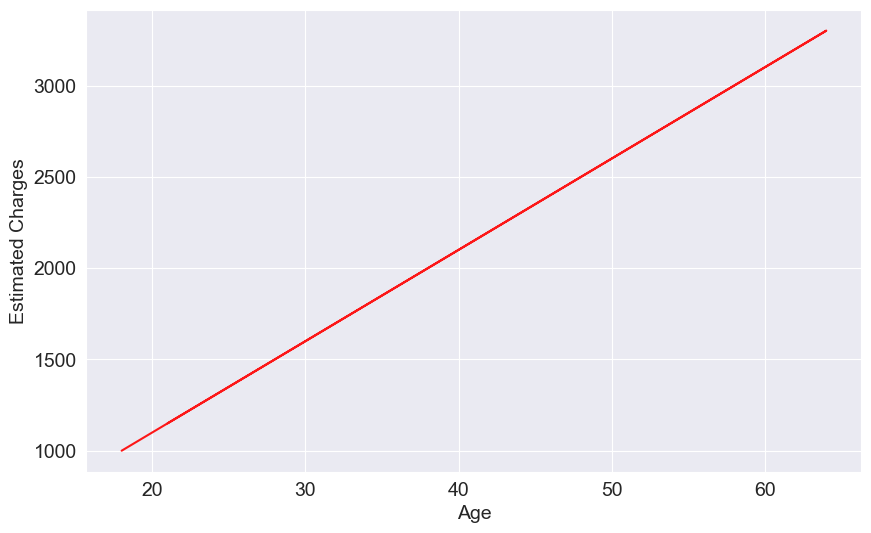

In [196]:
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.xlabel('Age')
plt.ylabel("Estimated Charges")

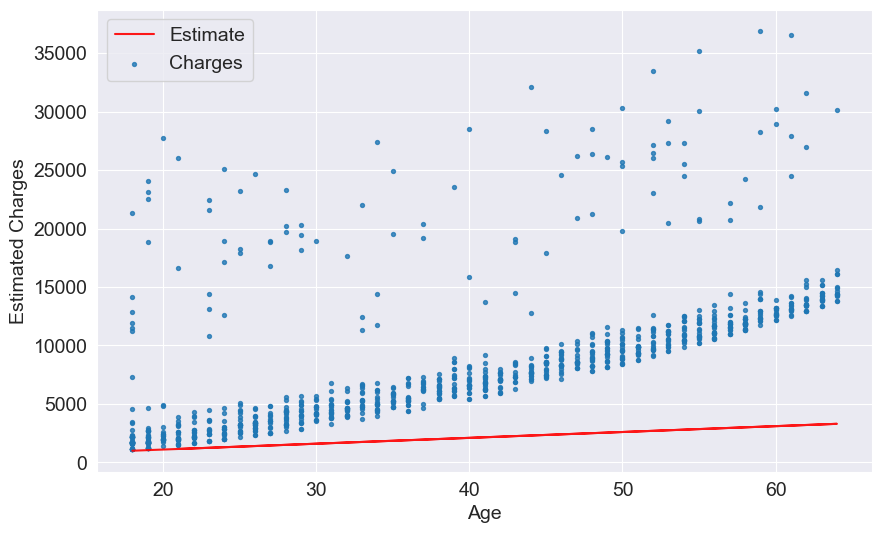

In [197]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel("Estimated Charges")
plt.legend(['Estimate', 'Charges'])

In [198]:
def try_parameter(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'red', alpha= 0.9)

    plt.scatter(ages, target, alpha=0.8)

    plt.xlabel("Ages")
    plt.ylabel("Charges")

    plt.legend(['Estimate', 'Actual'])

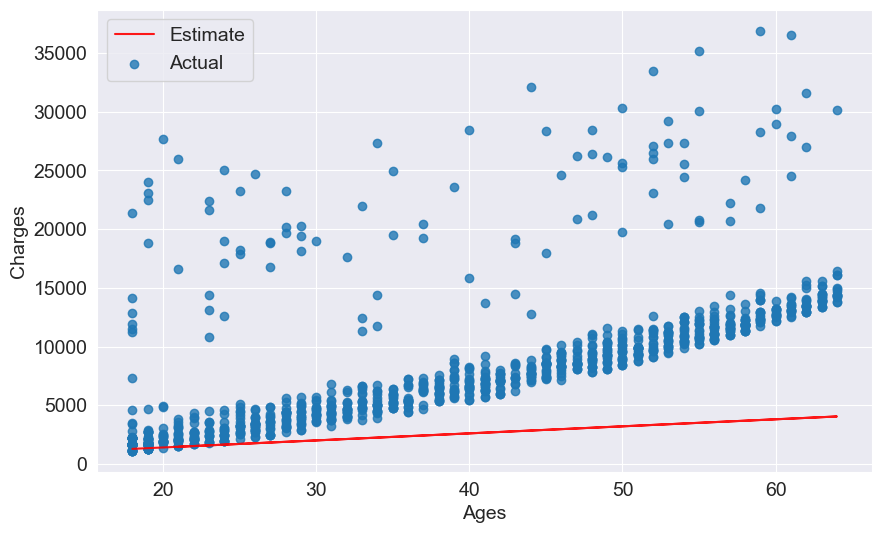

In [199]:
try_parameter(60, 200)

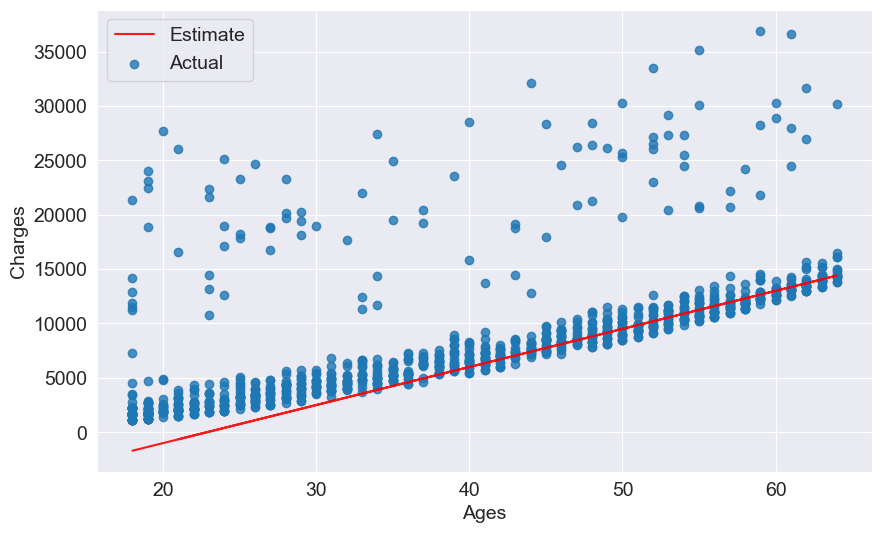

In [200]:
try_parameter(350, -8000)

In [201]:
import numpy as np

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">


In [202]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [203]:
w = 50
b =100

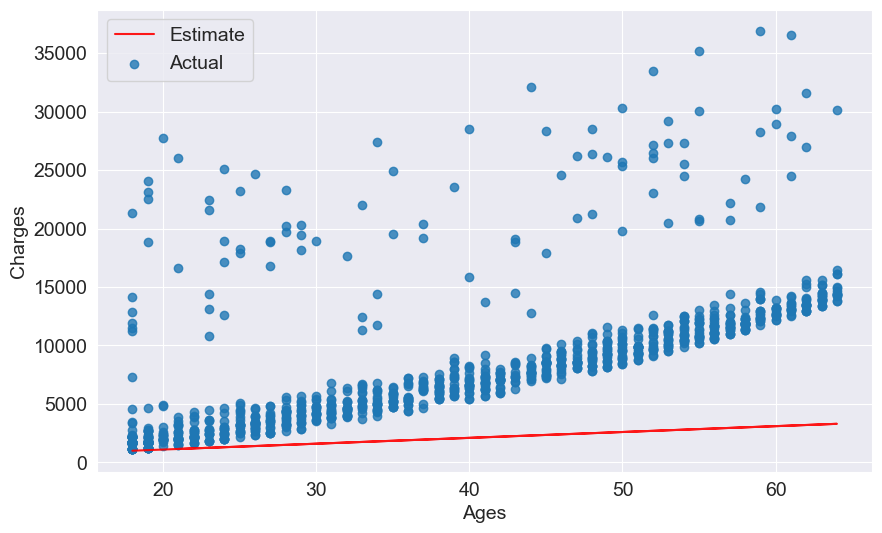

In [204]:
try_parameter(w, b)

In [205]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [206]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [207]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [208]:
def try_parameter(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predicted = estimate_charges(ages, w, b)

    plt.plot(ages, predicted, 'r', alpha = 0.9)
    plt.scatter(ages, target,s=8, alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(['Predictions', 'Actual'])

    loss = rmse(target, predicted)
    print(f'RMSE {loss}')

RMSE 4818.589201659388


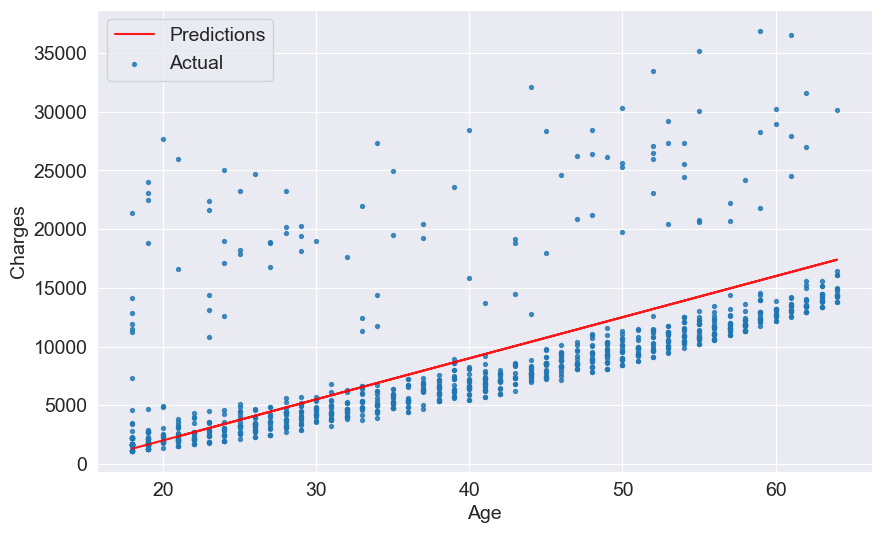

In [209]:
try_parameter(350, -5000)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
model = LinearRegression()

In [212]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [213]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print('inputs.shape', inputs.shape)
print('targets.shape' , targets.shape)

inputs.shape (1064, 1)
targets.shape (1064,)


In [214]:
model.fit(inputs, targets)

LinearRegression()

In [215]:
model.predict(np.array([[23], [37], [61]]))

C:\Users\Kelvin Mhacwilson\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [216]:
predictions = model.predict(inputs)

In [217]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [218]:
rmse(targets, predictions)

np.float64(4662.505766636395)

### W and B are Stored IN
w = model.coef_

b = model.intercept_

RMSE 4662.505766636395


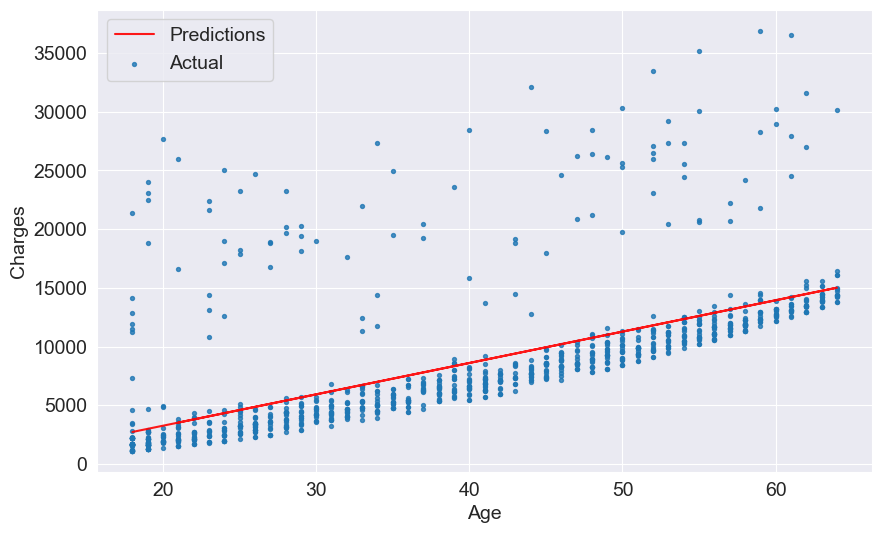

In [219]:
try_parameter(model.coef_, model.intercept_)

### Linear Regression using Multiple Features

$charges = w_1 * age + w_2 * bmi + b$

In [220]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 4662.3128354612945


In [221]:
fig = px.strip(medical_df, x=medical_df.children, y=medical_df.charges)
fig.show()

In [222]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f'Loss: {loss}')

Loss: 4608.470405038246


## For the Entire Data Set

In [223]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f'Loss: {loss}')

Loss: 11355.317901125973


In [224]:
px.scatter(medical_df, x='age', y='charges', color='smoker', hover_data=['children'])

<Axes: xlabel='smoker', ylabel='charges'>

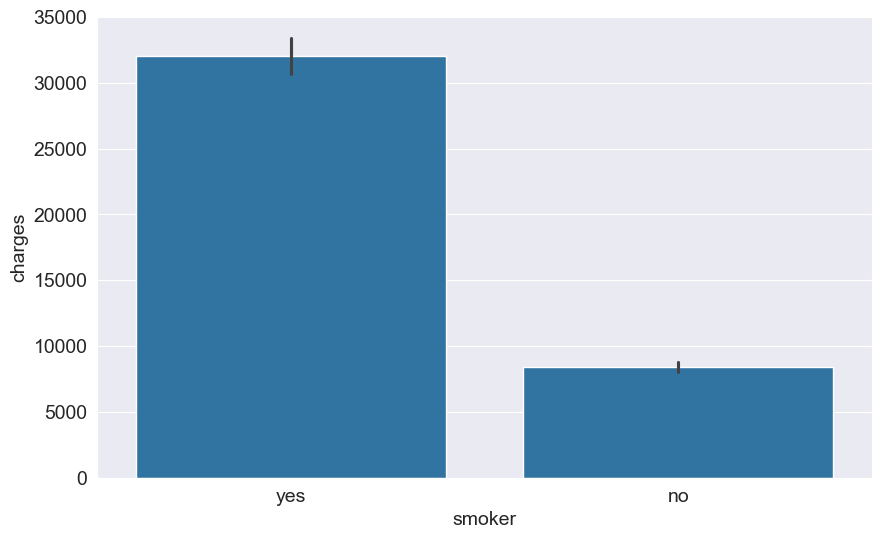

In [225]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [226]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [227]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [229]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [234]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

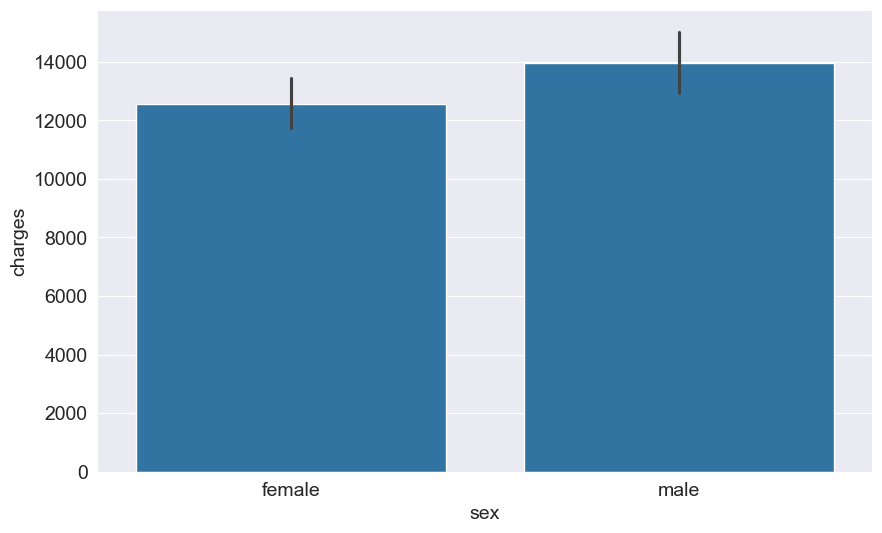

In [240]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [241]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [249]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202533)

In [248]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

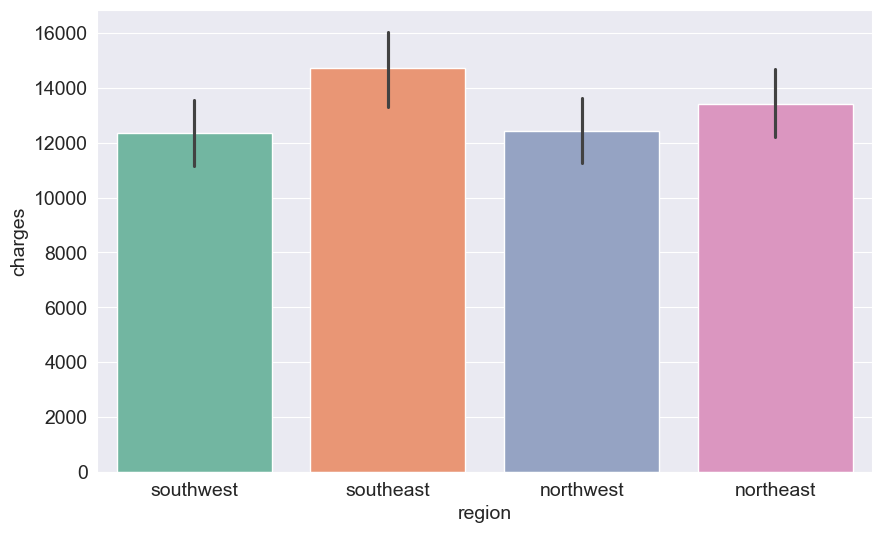

In [257]:
sns.barplot(data=medical_df, x='region', y='charges', palette='Set2', hue='region')

In [260]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast']]).toarray()
# enc.transform([['northeast'], ['northwest']]).toarray()

In [263]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [268]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [269]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [270]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# Check 2:00 to 2:15

##### Creating a Test Set

In [271]:
from sklearn.model_selection import train_test_split

In [273]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

# End on 2:17